In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [31]:
data = pd.read_csv("heart.csv")
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The Attributess include:
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]


In [32]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [33]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [34]:
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")

In [35]:
data.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [37]:
string_col=data.select_dtypes("string").columns.to_list()
num_col=data.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


a dataset with 918 entries and 12 columns, including features like Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, and HeartDisease.

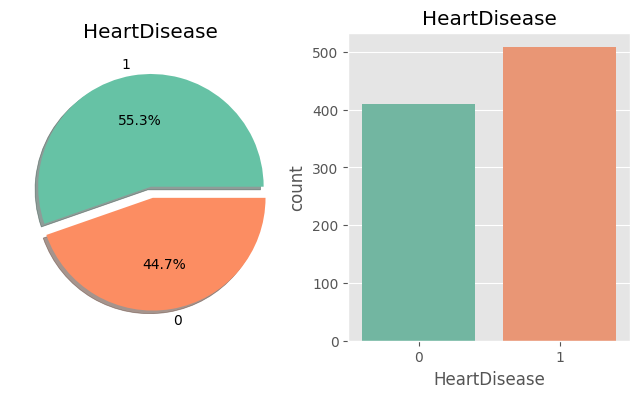

In [39]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
data['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=sns.color_palette('Set2'))
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')
sns.countplot(data, x='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('HeartDisease')
plt.show()

In [40]:
pd.crosstab(data.Sex, data.HeartDisease, margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


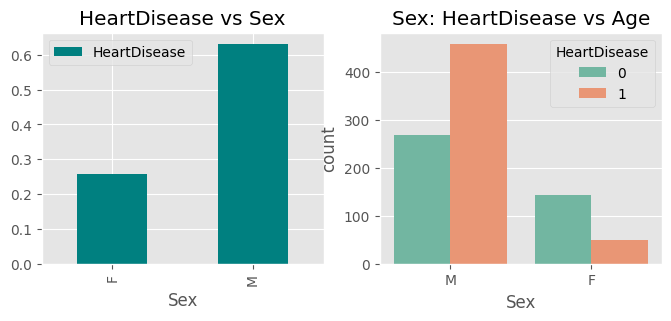

In [41]:
f, ax=plt.subplots(1, 2, figsize=(8,3))

data[['Sex','HeartDisease']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color='teal')
ax[0].set_title('HeartDisease vs Sex')

sns.countplot(data, x='Sex',hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('Sex: HeartDisease vs Age')

plt.show()

In [42]:
pd.crosstab(data.Age, data.HeartDisease, margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
Age,,,
28,1,0,1
29,3,0,3
30,1,0,1
31,1,1,2
32,3,2,5
33,1,1,2
34,5,2,7
35,7,4,11
36,4,2,6


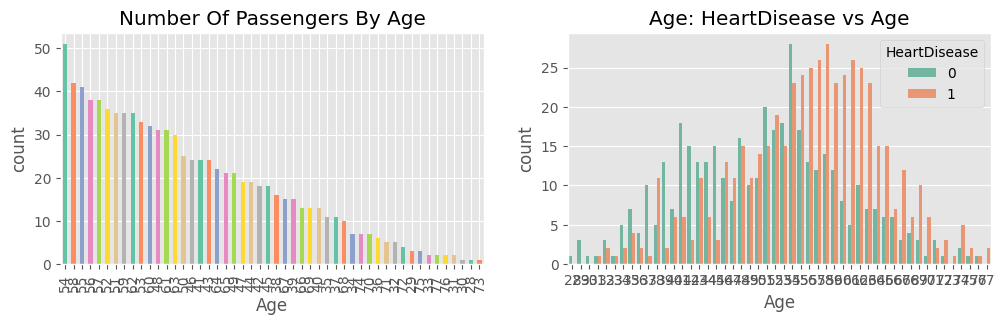

In [44]:
f, ax = plt.subplots(1, 2, figsize=(12,3))

data['Age'].value_counts().plot.bar(color=sns.color_palette('Set2'), ax=ax[0])
ax[0].set_title('Number Of Passengers By Age')
ax[0].set_ylabel('count')

sns.countplot(data, x='Age', hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('Age: HeartDisease vs Age')

plt.show()

In [64]:
pd.crosstab([data.Sex,data.HeartDisease], data.ChestPainType, margins=True).style.background_gradient(cmap='summer_r')

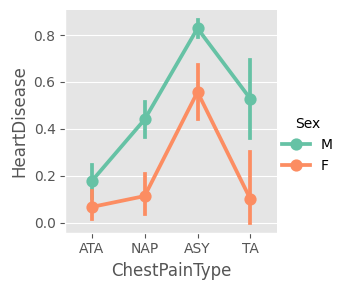

In [65]:
sns.catplot(data, x='ChestPainType', y='HeartDisease', hue='Sex', palette='Set2',
            kind="point", height=3, aspect=1)

[]

<Figure size 1500x1000 with 0 Axes>

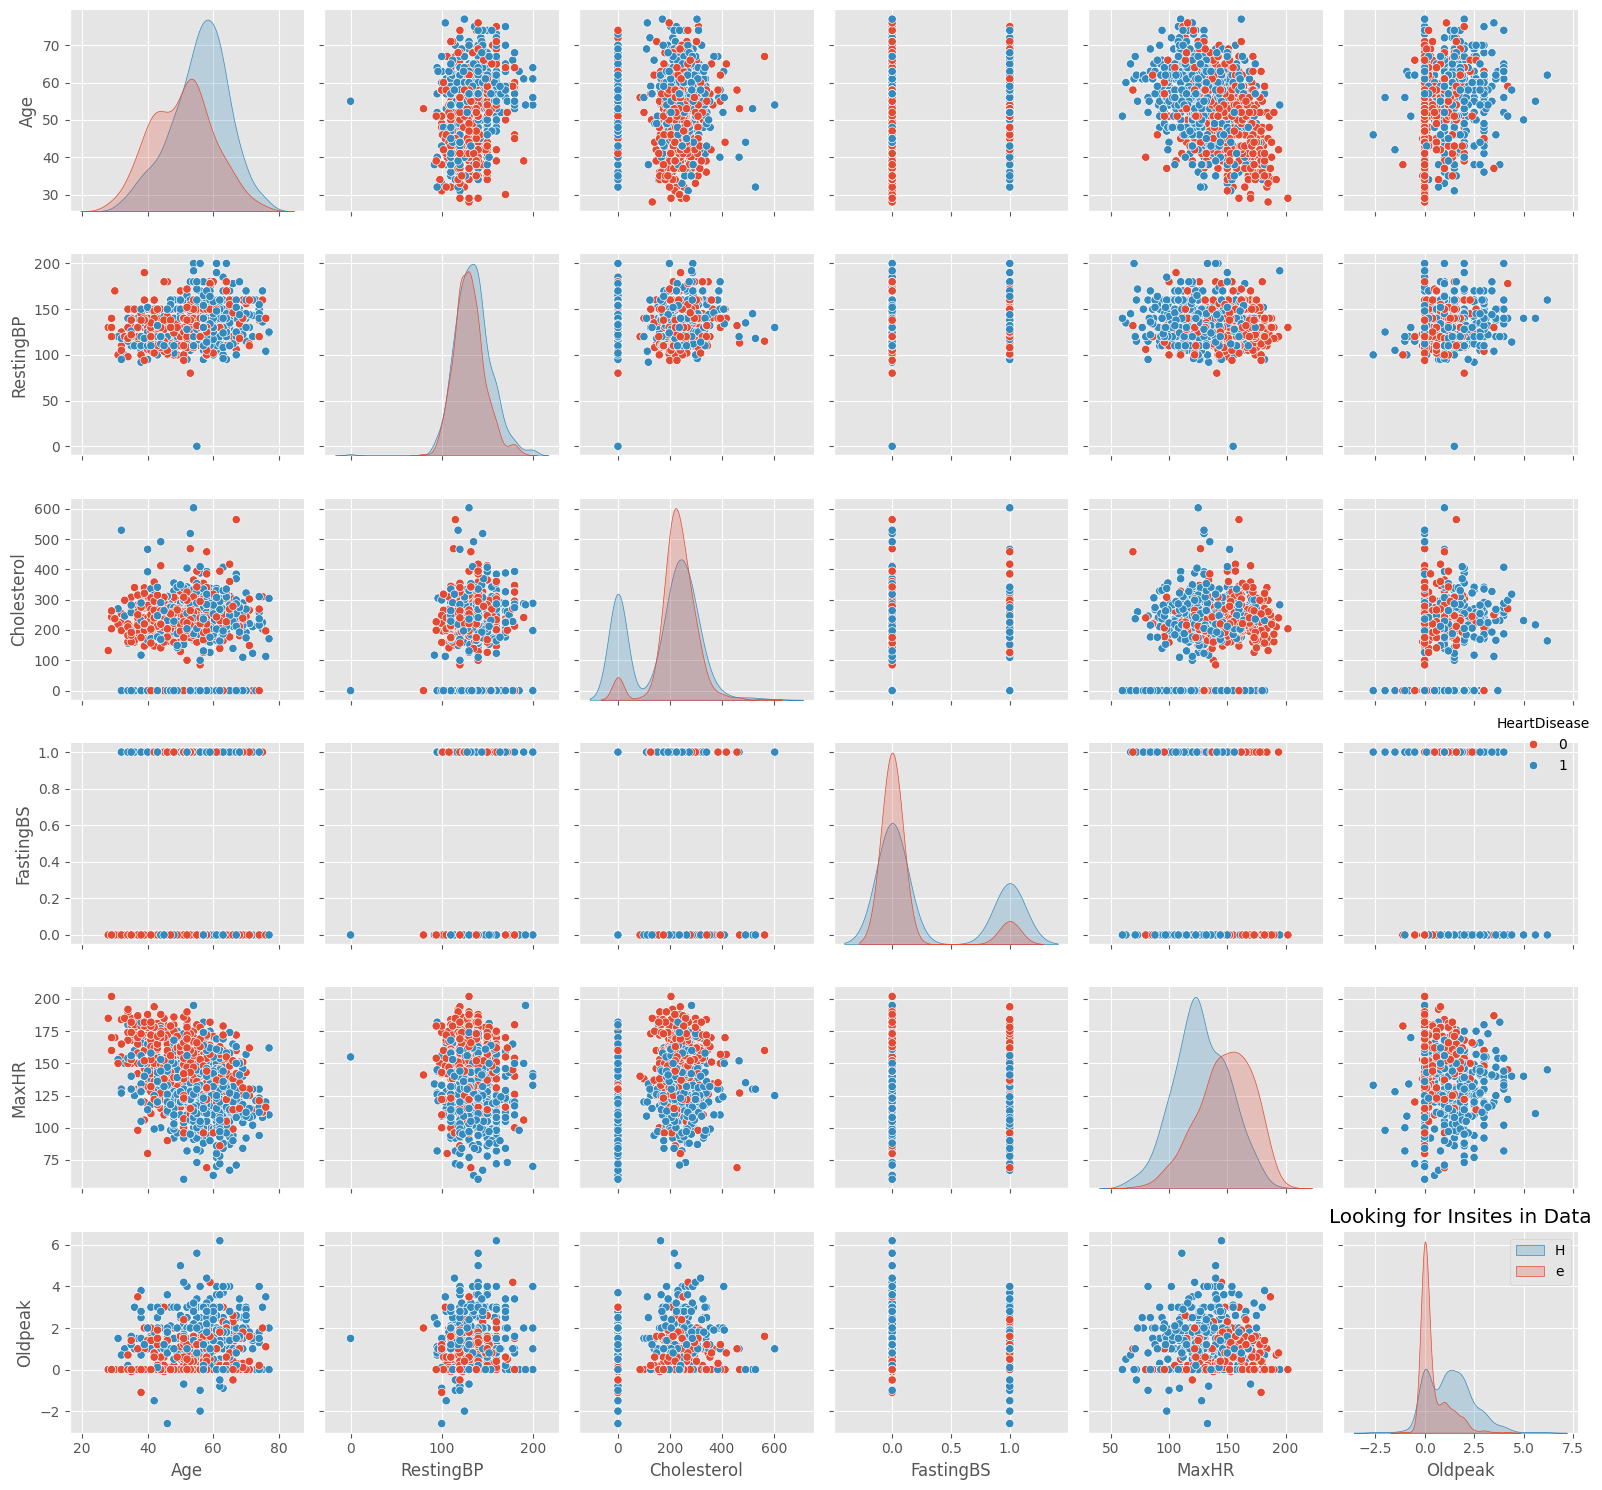

In [48]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [50]:
fig = px.box(data,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [52]:
fig = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [54]:
fig = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [56]:
fig = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [58]:
fig = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

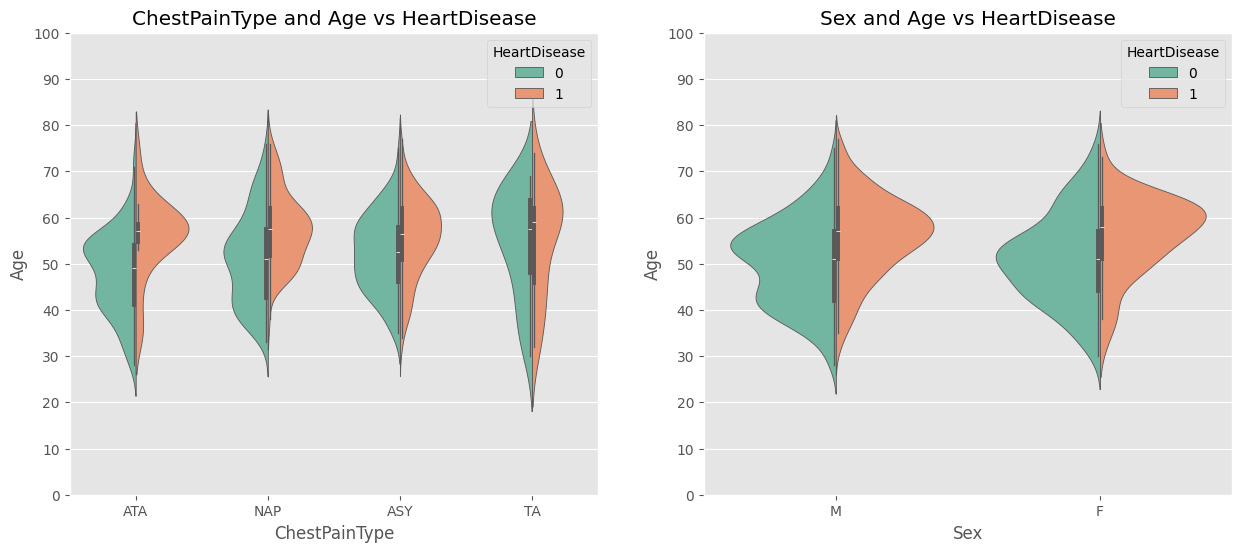

In [70]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="ChestPainType", y="Age", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title('ChestPainType and Age vs HeartDisease')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data, x="Sex", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title('Sex and Age vs HeartDisease')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [62]:
data[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [66]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 77 Years
Youngest Passenger was of: 28 Years
Average Age on the ship: 53.510893246187365 Years


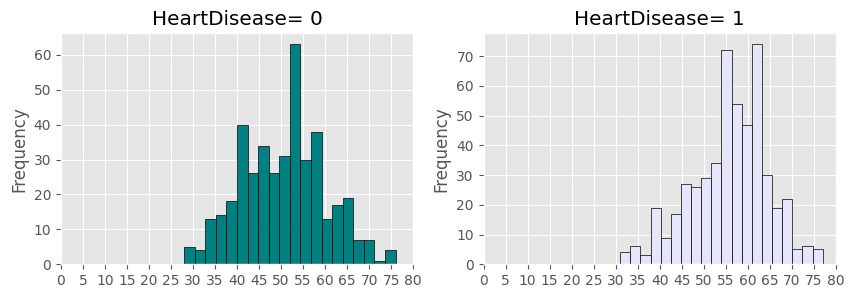

In [69]:
f, ax=plt.subplots(1,2,figsize=(10,3))

data[data['HeartDisease']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='teal')
ax[0].set_title('HeartDisease= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['HeartDisease']==1].Age.plot.hist(ax=ax[1], color='lavender', bins=20, edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

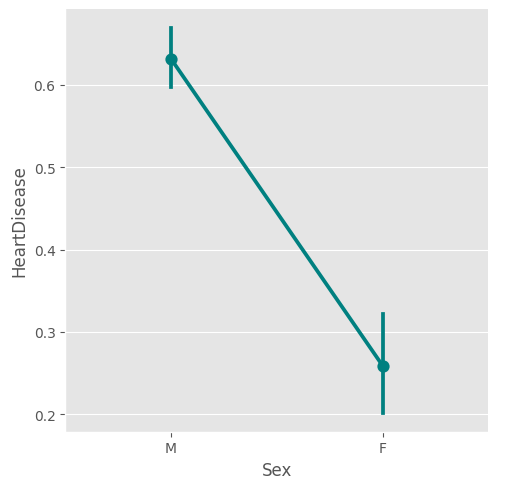

In [71]:
sns.catplot(data, x='Sex', y='HeartDisease', kind='point', color='teal')

In [72]:
pd.crosstab([data.ChestPainType, data.RestingECG],[data.Sex, data.HeartDisease], margins=True).style.background_gradient(cmap='summer_r')

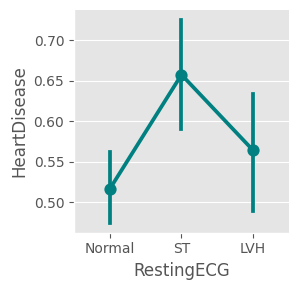

In [73]:
sns.catplot(data, x='RestingECG', y='HeartDisease', kind='point',
            color='teal', height=3, aspect=1)

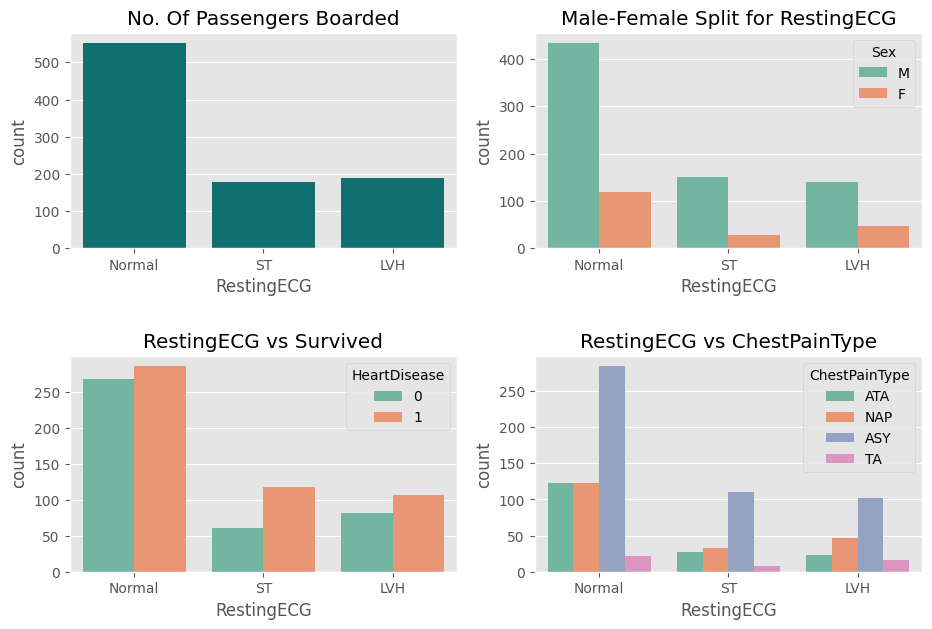

In [75]:
f, ax=plt.subplots(2,2, figsize=(11,7))

sns.countplot(data, x='RestingECG', ax=ax[0,0], color='teal')
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(data, x='RestingECG',hue='Sex', ax=ax[0,1], palette='Set2')
ax[0,1].set_title('Male-Female Split for RestingECG')

sns.countplot(data, x='RestingECG', hue='HeartDisease', ax=ax[1,0], palette='Set2')
ax[1,0].set_title('RestingECG vs Survived')

sns.countplot(data, x='RestingECG', hue='ChestPainType', ax=ax[1,1], palette='Set2')
ax[1,1].set_title('RestingECG vs ChestPainType')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

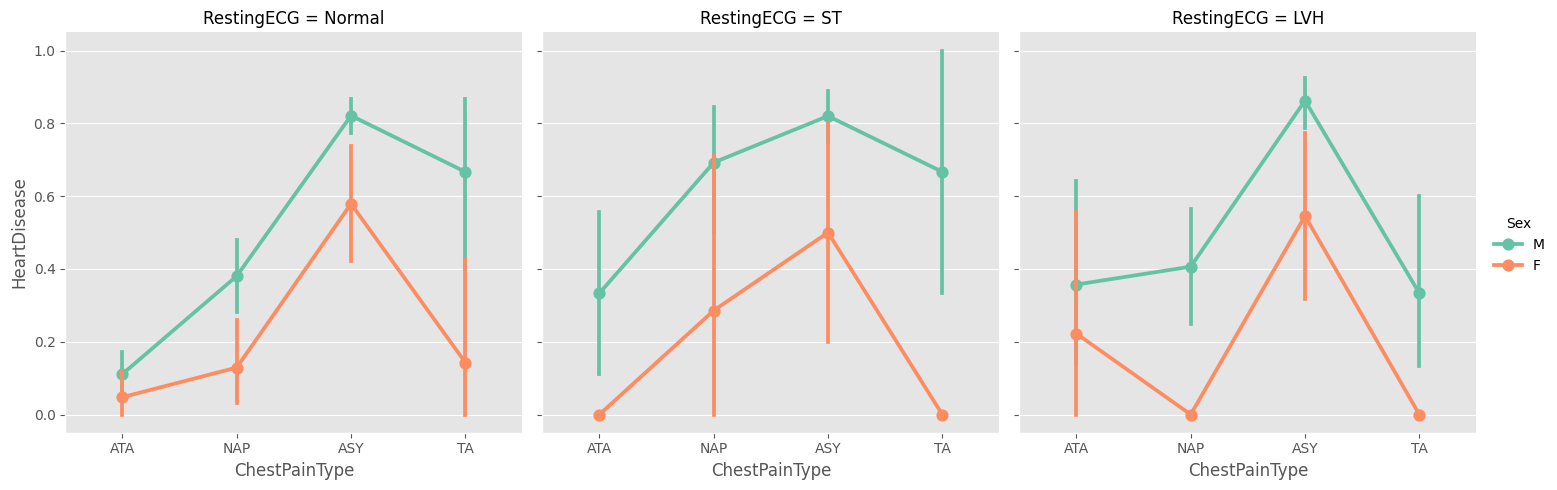

In [76]:
sns.catplot(data, x='ChestPainType', y='HeartDisease', hue='Sex', col='RestingECG', kind='point', palette='Set2')

In [77]:
data['RestingECG'].fillna('S', inplace=True)

In [78]:
data.RestingECG.isnull().any()

False

Heart Disease Distribution:

Around 55% of the samples have heart disease, while the remaining 45% do not.
Heart Disease by Gender:

There appears to be a difference in the prevalence of heart disease between males and females. More males seem to have heart disease compared to females.
Age Distribution:

The age distribution shows a peak around the 55-65 age range, with heart disease being more prevalent in older age groups.
Chest Pain Type:

The distribution of chest pain types among those with and without heart disease could be insightful. For example, certain types of chest pain might be more strongly associated with heart disease.
Resting ECG:

There seems to be a variation in the distribution of resting ECG types among the samples, and it could be interesting to see how it relates to the presence of heart disease.
Insights from Box Plots:

Box plots provide a clear visualization of the distribution of various features like age, resting blood pressure (RestingBP), cholesterol levels, old peak, and maximum heart rate (MaxHR) concerning the presence or absence of heart disease.
Violin Plots:

These plots provide a combination of box plots and kernel density estimation, showing the distribution of age across different categories like chest pain type and gender concerning heart disease.
Handling Missing Values:

It seems like have filled missing values in the 'RestingECG' column with 'S', but it's essential to ensure that this choice doesn't introduce bias into the analysis.